In [1]:
import sys
sys.path.append('..')

from nn import Model
from nn.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNorm2D
from nn.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

np.set_printoptions(precision=3)
np.random.seed(1)

In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], -1))
X_train = X_train[:4000] / 255
y_train = y_train[:4000]

X_test = X_test.reshape((X_test.shape[0], -1))
X_test = X_test / 255

In [3]:
model = Model()
model.add(Conv2D(5, (2, 2), activation='relu', input_shape=(1, 28, 28)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNorm2D())
model.add(Conv2D(5, (2, 2), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNorm2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(Adam(learning_rate=0.01))
model.fit(X_train, y_train, epochs=7, batch_size=32, verbose=True)

Epoch 1/7
4000/4000 - loss: 6.9919 - accuracy: 0.14005
Epoch 2/7
4000/4000 - loss: 2.3103 - accuracy: 0.1000
Epoch 3/7
4000/4000 - loss: 2.3056 - accuracy: 0.1020
Epoch 4/7
4000/4000 - loss: 2.3060 - accuracy: 0.1015
Epoch 5/7
4000/4000 - loss: 2.3067 - accuracy: 0.1027
Epoch 6/7
4000/4000 - loss: 2.3075 - accuracy: 0.1032
Epoch 7/7
4000/4000 - loss: 2.3064 - accuracy: 0.1057


Because batch normalization layer distributes inputs around a zero mean there are a lot of values below zero which are turned to zero after being fed to the relu activation function. That leads to the problem called "dying relu". Dead units do not propagate any gradients back. The more units are dead the harder to update weights.

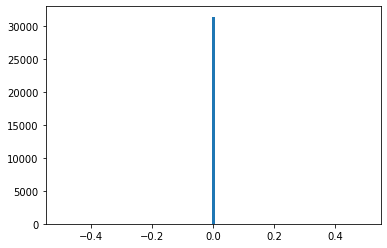

In [40]:
from nn.activations import relu

conv_layer2 = model.layers[3]
activations = relu(conv_layer2.convs.flatten())

plt.hist(activations, 101)
plt.show()